In [1]:
'''
Dropout is a regularization technique used in machine learning, specifically in training neural networks, to prevent overfitting. 
Overfitting occurs when a model performs very well on the training data but poorly on unseen test data because it has "memorized" the training examples rather than learning general patterns.

How Dropout Works:
During the training process, dropout randomly "drops" (sets to zero) a proportion of the neurons in the network, which means these neurons do not contribute to forward or backward propagation in that particular training step. 
The process is repeated for each batch during training, and the neurons that are dropped vary randomly with each batch.
'''

'\nDropout is a regularization technique used in machine learning, specifically in training neural networks, to prevent overfitting. \nOverfitting occurs when a model performs very well on the training data but poorly on unseen test data because it has "memorized" the training examples rather than learning general patterns.\n\nHow Dropout Works:\nDuring the training process, dropout randomly "drops" (sets to zero) a proportion of the neurons in the network, which means these neurons do not contribute to forward or backward propagation in that particular training step. \nThe process is repeated for each batch during training, and the neurons that are dropped vary randomly with each batch.\n'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_classification
from pylab import *
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split


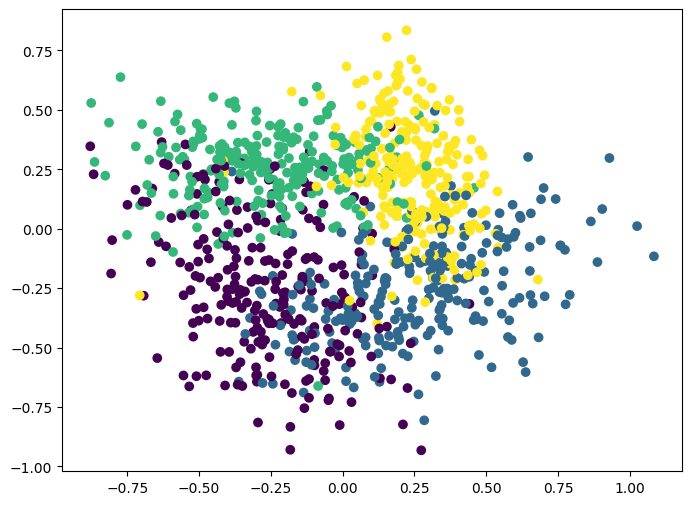

In [6]:
X, y = make_classification(n_features=2, n_classes=4, n_samples=1000, n_redundant=0, n_informative=2, random_state=47, n_clusters_per_class=1, scale = 0.25)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

In [7]:
y = keras.utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [10]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


print(model.summary())

history = model.fit(X_train, y_train,
                    batch_size = 100,
                    epochs = 100, 
                    verbose =2,
                    validation_data = (X_test, y_test))

scores= model.evaluate(X_test, y_test, verbose = 1)
print('Test loss: ', scores[0])
print('Test accuracy: ', scores[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                48        
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
Total params: 220 (880.00 Byte)
Trainable params: 220 (880.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100
8/8 - 1s - loss: 1.3800 - accuracy: 0.2075 - val_loss: 1.3743 - val_accuracy: 0.2650 - 591ms/epoch - 74ms/step
Epoch 2/100
8/8 - 0s - loss: 1.3668 - accuracy: 0.3363 - val_loss: 1.3621 - val_accuracy: 0.4600 - 23ms/epoch - 3ms/step
Epoch 3/100
8/8 - 0s - loss: 1.

In [12]:
# Check the behaviour with dropout

model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


print(model.summary())

history = model.fit(X_train, y_train,
                    batch_size = 100,
                    epochs = 100,
                    verbose = 2,
                    validation_data = (X_test, y_test))


scores = model.evaluate(X_test, y_test, verbose = 1)
print('Test loss: ', scores[0])
print('Test accuracy: ', scores[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                48        
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
Total params: 220 (880.00 Byte)
Trainable params: 220 (880.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/100